## Análise dos dados - Precipitação como target

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from itertools import product
from matplotlib import pyplot as plt
from sklearn import tree

In [2]:
#Dados do Cerrado Brasileiro, armazenados mensalmente via .csv
arquivos = ['janeiro.csv','fev.csv','marco.csv','abril.csv','maio.csv','junho.csv','julho.csv']

In [3]:
def read_csv(list_of_files):
    dfs = []
    for x in list_of_files:
        file = pd.read_csv(x, sep=',')
        dfs.append(file)
    df = pd.concat(dfs).reset_index(drop=True)
        
    return df

In [4]:
meses = read_csv(arquivos)

In [5]:
#Dados trabalhados para a eliminação de NaN nas colunas e identificação dos tipos de dados
meses.convert_dtypes()
meses.dropna(how='any', inplace=True)

In [6]:
# Para rodar o código pela primeira vez, descomente essas linhas

meses.drop(columns=['Unnamed: 0','estado', 'satelite', 'municipio', 'pais', 'municipio_id', 'estado_id', 'pais_id', 'bioma', 'risco_fogo'], axis = 1, inplace=True)

In [7]:
meses_chuva = meses['precipitacao'] > 0
meses_2 = meses[meses_chuva]

In [8]:
display(meses.describe())

,lat,lon,numero_dias_sem_chuva,precipitacao
count,273373.000000,273373.000000,273373.000000,273373.000000
mean,-12.048766,-48.222861,20.981487,0.209739
std,4.372613,4.025935,60.127384,1.448025
min,-24.617660,-60.029380,-999.000000,0.000000
25%,-14.382070,-50.144900,7.000000,0.000000
50%,-11.912250,-47.211150,20.000000,0.000000
75%,-8.854180,-45.229420,36.000000,0.000000
max,-2.382940,-41.698070,129.000000,66.900000


In [9]:
meses = meses.reset_index()
del meses['index']
display(meses)

,lat,lon,data_hora_gmt,numero_dias_sem_chuva,precipitacao
0,-12.314859,-43.234066,2022-03-02 01:05:48,9.0,2.7
1,-14.901800,-52.233601,2022-03-02 01:23:36,0.0,6.2
2,-14.904000,-52.242802,2022-03-02 01:23:36,0.0,5.9
3,-20.227880,-46.415940,2022-03-02 01:28:00,8.0,0.0
4,-20.229250,-46.426820,2022-03-02 01:28:00,8.0,0.0
...,...,...,...,...,...
273368,-6.360000,-45.670000,2022-07-29 23:54:47,46.0,0.0
273369,-6.360000,-45.690000,2022-07-29 23:54:47,46.0,0.0
273370,-6.400000,-44.140000,2022-07-29 23:54:47,34.0,0.0
273371,-6.350000,-45.670000,2022-07-29 23:54:47,46.0,0.0


In [10]:
TAMANHO_TESTE = 0.1 # fração de dados utilizada para teste: 10%
SEMENTE_ALEATORIA = 6000 # semente escolhida aleatoriamente
DATASET_NAME = "meses"
FEATURES = ["numero_dias_sem_chuva", "lat", "lon"]
TARGET = ["precipitacao"]

indices = meses_2.index
indices_treino, indices_teste = train_test_split(
    indices, test_size=TAMANHO_TESTE, random_state=SEMENTE_ALEATORIA
)

meses_treino = meses_2.loc[indices_treino]
meses_teste = meses_2.loc[indices_teste]

X_treino = meses_treino.reindex(FEATURES, axis=1).values
y_treino = meses_treino.reindex(TARGET, axis=1).values
X_teste = meses_teste.reindex(FEATURES, axis=1).values
y_teste = meses_teste.reindex(TARGET, axis=1).values

### K-vizinhos mais próximos

In [11]:
#cria o modelo 
modelo_knn = KNeighborsRegressor()

# treina o modelo
modelo_knn.fit(X_treino, y_treino)

# realiza uma previsão usando o modelo
previsao_knn = modelo_knn.predict(X_teste)
print(previsao_knn)

[[0.5  ]
 [0.52 ]
 [3.   ]
 ...
 [3.78 ]
 [3.738]
 [0.098]]


In [12]:
NUM_VIZINHOS = [1, 5, 10, 15, 20]

for n in NUM_VIZINHOS:
    modelo_knn = KNeighborsRegressor(n_neighbors=n)
    
    modelo_knn.fit(X_treino, y_treino)
    
    y_verdadeiro_knn = y_teste
    y_previsao_knn = modelo_knn.predict(X_teste)

    RMSE_knn = mean_squared_error(y_verdadeiro_knn, y_previsao_knn, squared=False)

    print(f"O RMSE do modelo k-NN foi de {RMSE_knn} com {n} vizinhos.")

O RMSE do modelo k-NN foi de 2.7236775698144493 com 1 vizinhos.
O RMSE do modelo k-NN foi de 3.2878989795479794 com 5 vizinhos.
O RMSE do modelo k-NN foi de 3.4986848958371763 com 10 vizinhos.
O RMSE do modelo k-NN foi de 3.5948530449450864 com 15 vizinhos.
O RMSE do modelo k-NN foi de 3.6648340196906846 com 20 vizinhos.


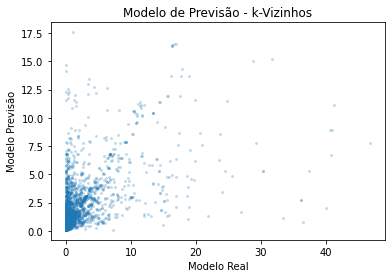

In [31]:
plt.plot(y_verdadeiro_knn, y_previsao_knn, label = 'Teste de Precisão do Dataset', ls='none', marker='o', alpha=0.2, markersize=2)
plt.title('Modelo de Previsão - k-Vizinhos')
plt.xlabel('Modelo Real')
plt.ylabel('Modelo Previsão')
plt.show()

### Regressão Linear

In [14]:
# cria o modelo
modelo_linear = LinearRegression()

# treina o modelo
modelo_linear.fit(X_treino, y_treino)

# realiza uma previsão usando o modelo treinado
previsao = modelo_linear.predict(X_teste)
print(previsao)

[[2.36602556]
 [1.84871257]
 [2.60723704]
 ...
 [1.88320297]
 [2.37085003]
 [1.97810482]]


In [15]:
y_verdadeiro_ml = y_teste
y_previsao_ml = modelo_linear.predict(X_teste)

RMSE_linear = mean_squared_error(y_verdadeiro_ml, y_previsao_ml, squared=False)

print(f"O RMSE do modelo linear foi de {RMSE_linear}.")

O RMSE do modelo linear foi de 4.200570346370156.


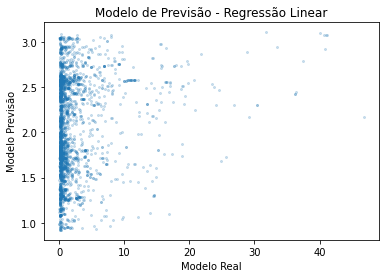

In [27]:
plt.plot(y_verdadeiro_ml, y_previsao_ml, label = 'Teste de Precisão do Dataset', ls='none', marker='o', alpha=0.2, markersize=2)
plt.title('Modelo de Previsão - Regressão Linear')
plt.xlabel('Modelo Real')
plt.ylabel('Modelo Previsão')
plt.show()

### Árvore de Decisão

In [17]:
from sklearn.tree import DecisionTreeRegressor

# cria o modelo
modelo_ad = DecisionTreeRegressor(random_state=SEMENTE_ALEATORIA)

# treina o modelo
modelo_ad.fit(X_treino, y_treino)

# realiza uma previsão usando o modelo treinado
previsao_ad = modelo_ad.predict(X_teste)
print(previsao_ad)

[0.5  0.73 3.1  ... 2.9  3.76 0.2 ]


In [18]:
from itertools import product

NUM_FOLHAS = [None, 6, 36]
NUM_PROFUNDIDADE = [None, 3, 10]

for n_folhas, n_profundidade in product(NUM_FOLHAS, NUM_PROFUNDIDADE):
    modelo_ad = DecisionTreeRegressor(
        max_leaf_nodes=n_folhas,
        max_depth=n_profundidade,
        random_state=SEMENTE_ALEATORIA,
    )

    modelo_ad.fit(X_treino, y_treino)

    y_verdadeiro_ad = y_teste
    y_previsao_ad = modelo_ad.predict(X_teste)
    RMSE_ad = mean_squared_error(y_verdadeiro_ad, y_previsao_ad, squared=False)

    print(
        f"O RMSE do modelo AD usando max_leaf_nodes={n_folhas} "
        f"e max_depth={n_profundidade} foi de {RMSE_ad:.2f}."
    )

O RMSE do modelo AD usando max_leaf_nodes=None e max_depth=None foi de 2.45.
O RMSE do modelo AD usando max_leaf_nodes=None e max_depth=3 foi de 4.12.
O RMSE do modelo AD usando max_leaf_nodes=None e max_depth=10 foi de 3.47.
O RMSE do modelo AD usando max_leaf_nodes=6 e max_depth=None foi de 4.16.
O RMSE do modelo AD usando max_leaf_nodes=6 e max_depth=3 foi de 4.14.
O RMSE do modelo AD usando max_leaf_nodes=6 e max_depth=10 foi de 4.16.
O RMSE do modelo AD usando max_leaf_nodes=36 e max_depth=None foi de 3.99.
O RMSE do modelo AD usando max_leaf_nodes=36 e max_depth=3 foi de 4.12.
O RMSE do modelo AD usando max_leaf_nodes=36 e max_depth=10 foi de 3.90.


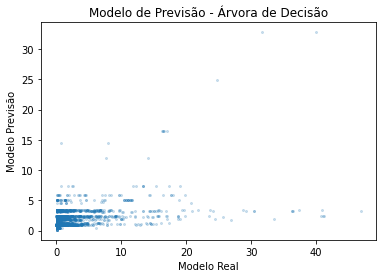

In [32]:
plt.plot(y_verdadeiro_ad, y_previsao_ad, label = 'Teste de Precisão do Dataset', ls='none', marker='o', alpha=0.2, markersize=2)
plt.title('Modelo de Previsão - Árvora de Decisão')
plt.xlabel('Modelo Real')
plt.ylabel('Modelo Previsão')
plt.show()

### Floresta Aleatória

In [21]:
from sklearn.ensemble import RandomForestRegressor

# alterando o formato do target
print(y_treino.shape, y_teste.shape)
y_treino = y_treino.ravel()
y_teste = y_teste.ravel()
print(y_treino.shape, y_teste.shape)

# cria o modelo
modelo_fa = RandomForestRegressor(random_state=SEMENTE_ALEATORIA)

# treina o modelo
modelo_fa.fit(X_treino, y_treino)

# realiza uma previsão usando o modelo treinado
previsao_fa = modelo_fa.predict(X_teste)
print()
print(previsao_fa)

(25049, 1) (2784, 1)
(25049,) (2784,)

[0.5        0.76503289 3.064      ... 3.256      3.7539     0.3353    ]


In [23]:
from itertools import product

NUM_ARVORES = [10, 100, 300]
NUM_FOLHAS = [None, 6]
NUM_PROFUNDIDADE = [None, 3]

for n_folhas, n_profundidade, n_arvores in product(
    NUM_FOLHAS, NUM_PROFUNDIDADE, NUM_ARVORES
):
    modelo_fa = RandomForestRegressor(
        n_estimators = n_arvores,
        max_leaf_nodes = n_folhas,
        max_depth = n_profundidade,
        random_state = SEMENTE_ALEATORIA,
        n_jobs = 4,
    )

    modelo_fa.fit(X_treino, y_treino)

    y_verdadeiro_fa = y_teste
    y_previsao_fa = modelo_fa.predict(X_teste)
    
    RMSE_fa = mean_squared_error(y_verdadeiro_fa, y_previsao_fa, squared=False)

    print(
        f"O RMSE do modelo RF usando "
        f"n_estimators={n_arvores} max_leaf_nodes={n_folhas} "
        f"e max_depth={n_profundidade} foi de {RMSE_fa:.2f}."
    )

O RMSE do modelo RF usando n_estimators=10 max_leaf_nodes=None e max_depth=None foi de 2.61.
O RMSE do modelo RF usando n_estimators=100 max_leaf_nodes=None e max_depth=None foi de 2.47.
O RMSE do modelo RF usando n_estimators=300 max_leaf_nodes=None e max_depth=None foi de 2.46.
O RMSE do modelo RF usando n_estimators=10 max_leaf_nodes=None e max_depth=3 foi de 4.08.
O RMSE do modelo RF usando n_estimators=100 max_leaf_nodes=None e max_depth=3 foi de 4.09.
O RMSE do modelo RF usando n_estimators=300 max_leaf_nodes=None e max_depth=3 foi de 4.09.
O RMSE do modelo RF usando n_estimators=10 max_leaf_nodes=6 e max_depth=None foi de 4.11.
O RMSE do modelo RF usando n_estimators=100 max_leaf_nodes=6 e max_depth=None foi de 4.12.
O RMSE do modelo RF usando n_estimators=300 max_leaf_nodes=6 e max_depth=None foi de 4.12.
O RMSE do modelo RF usando n_estimators=10 max_leaf_nodes=6 e max_depth=3 foi de 4.11.
O RMSE do modelo RF usando n_estimators=100 max_leaf_nodes=6 e max_depth=3 foi de 4.11.


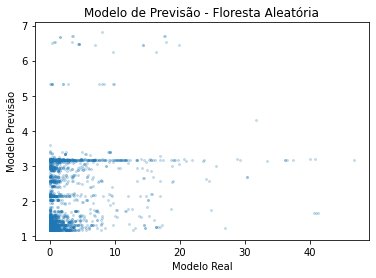

In [30]:
plt.plot(y_verdadeiro_fa, y_previsao_fa, label = 'Teste de Precisão do Dataset', ls='none', marker='o', alpha=0.2, markersize=2)
plt.title('Modelo de Previsão - Floresta Aleatória')
plt.xlabel('Modelo Real')
plt.ylabel('Modelo Previsão')
plt.show()

Analisar e criar uma hipótese do que pode ser, vemos que claramente, não conseguimos prever nada com os dados que temos. A falta e features pode ter influenciado fortemente nos resultados dos modelos, uma vez que não temos informações básicas como temperatura, umidade do ar e do solo e até o uso de solo.

Falta de especificação e diferenciação de dados numéricos, o que causa essas colunas de pontos sobrepostos.